<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EC%95%99%EC%83%81%EB%B8%94%EB%AA%A8%EB%8D%B8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[앙상블 모델](https://paullabworkspace.notion.site/XGB-LightGBM-1461f08ae59e4019b528978384307cfd)

## XGBoost

### XGBClassifier, XGBRegressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [2]:
# f1 score 와 roc_auc_score 까지 분류모델 평가 지표를 확인해보기 위한 사용자 정의함수
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print(f'정확도 : {accuracy:.2f}, 정밀도 : {precision:.2f}, 재현율 : {recall:.2f}')
    print(f'f1-score : {f1:.2f}, auc : {roc_score:.2f}')

In [3]:
data = load_breast_cancer() # 유방암 데이터셋

cancer = pd.DataFrame(data.data, columns = data.feature_names)
cancer['target'] = data.target
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
cancer['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [5]:
y = cancer['target']
X = cancer.drop('target', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 11)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [6]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=4)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

metrics(y_test, xgb_pred)

정확도 : 0.99, 정밀도 : 0.99, 재현율 : 1.00
f1-score : 0.99, auc : 0.99


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

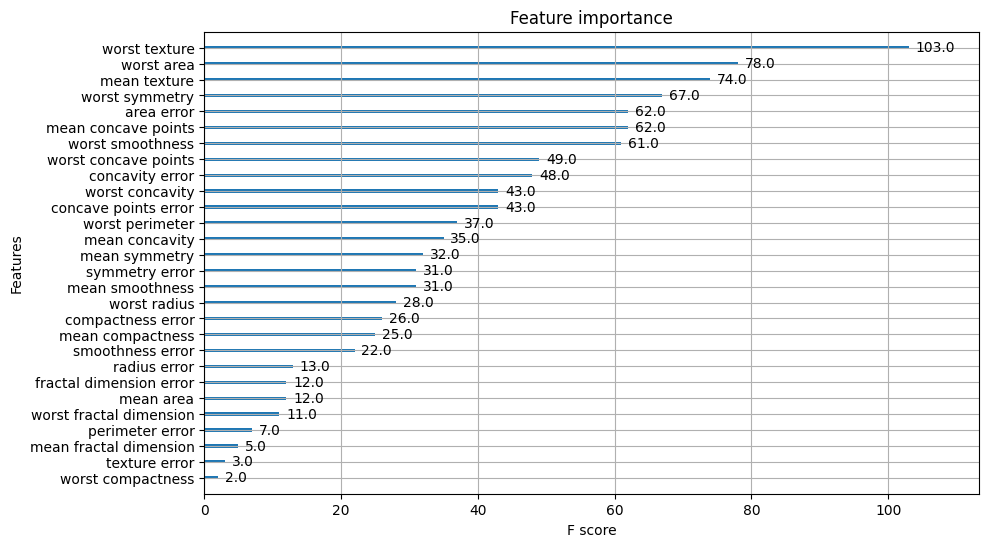

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
plot_importance(xgb, ax= ax)

In [8]:
# GridSearchCV 로 최적의 파라미터를 찾기
xgb_param_grid = {
    'n_estimators' : [100, 200, 400, 600],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth' : [4, 6, 8 ,10, 12],
}

xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="accuracy",
                        n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bi...
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [100, 200, 400, 600]},
             scoring='accuracy', verbose=1)

In [11]:
print(f'최고 평균 정확도 : {xgb_grid.best_score_: .4f}')
print(f'하이퍼 파라미터: {xgb_grid.best_params_}')

최고 평균 정확도 :  0.9714
하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 600}


In [10]:
# parameter 별로 스코어가 어떻게 되는 지 확인
cv_result_df = pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
97,"{'learning_rate': 0.2, 'max_depth': 12, 'n_est...",0.971429,1
43,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.971429,1
85,"{'learning_rate': 0.2, 'max_depth': 6, 'n_esti...",0.971429,1
86,"{'learning_rate': 0.2, 'max_depth': 6, 'n_esti...",0.971429,1
93,"{'learning_rate': 0.2, 'max_depth': 10, 'n_est...",0.971429,1
87,"{'learning_rate': 0.2, 'max_depth': 6, 'n_esti...",0.971429,1
89,"{'learning_rate': 0.2, 'max_depth': 8, 'n_esti...",0.971429,1
99,"{'learning_rate': 0.2, 'max_depth': 12, 'n_est...",0.969231,8
90,"{'learning_rate': 0.2, 'max_depth': 8, 'n_esti...",0.969231,8
91,"{'learning_rate': 0.2, 'max_depth': 8, 'n_esti...",0.969231,8


In [12]:
# Early stopping 조기종료 조건을 이용해서 과대적합을 막는 방법
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, cross_validate
import xgboost as xgb

X, y = load_breast_cancer(return_X_y=True)

def fit_and_score(estimator, X_train, X_test, y_train, y_test):
    """Fit the estimator on the train set and score it on both sets"""
    estimator.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    train_score = estimator.score(X_train, y_train)
    test_score = estimator.score(X_test, y_test)
    return estimator, train_score, test_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=94)
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=3)
resutls = {}

for train, test in cv.split(X, y):
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    est, train_score, test_score = fit_and_score(
        clone(clf), X_train, X_test, y_train, y_test
    )
    resutls[est] = (train_score, test_score)

[0]	validation_0-logloss:0.50022
[1]	validation_0-logloss:0.38684
[2]	validation_0-logloss:0.32469
[3]	validation_0-logloss:0.28052
[4]	validation_0-logloss:0.25413
[5]	validation_0-logloss:0.22743
[6]	validation_0-logloss:0.20214
[7]	validation_0-logloss:0.18591
[8]	validation_0-logloss:0.18259
[9]	validation_0-logloss:0.17082
[10]	validation_0-logloss:0.16901
[11]	validation_0-logloss:0.16437
[12]	validation_0-logloss:0.16439
[13]	validation_0-logloss:0.16019
[14]	validation_0-logloss:0.15943
[15]	validation_0-logloss:0.15411
[16]	validation_0-logloss:0.15351
[17]	validation_0-logloss:0.15379
[18]	validation_0-logloss:0.15367
[19]	validation_0-logloss:0.15703
[0]	validation_0-logloss:0.48726
[1]	validation_0-logloss:0.37225
[2]	validation_0-logloss:0.29824
[3]	validation_0-logloss:0.24917
[4]	validation_0-logloss:0.21762
[5]	validation_0-logloss:0.18820
[6]	validation_0-logloss:0.16853
[7]	validation_0-logloss:0.15617
[8]	validation_0-logloss:0.15189
[9]	validation_0-logloss:0.14301


## LightGBM

In [13]:
pip install lightgbm

In [15]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from lightgbm import plot_importance
import matplotlib.pyplot as plt

- n_estimators : 반복하려는 트리 개수
- learning_rate : 학습률
- max_depth : 트리 깊이
- min_child_samples : 리프 노드가 되기 위한 최소한의 샘플 데이터 수
- num_leaves : 하나의 트리가 가질 수 있는 최대 리프 개수
- feture_fraction : 트리 학습 시 선택하는 feature 비율
- reg_lambda : L2 규제
- reg_alpha : l1 규제

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

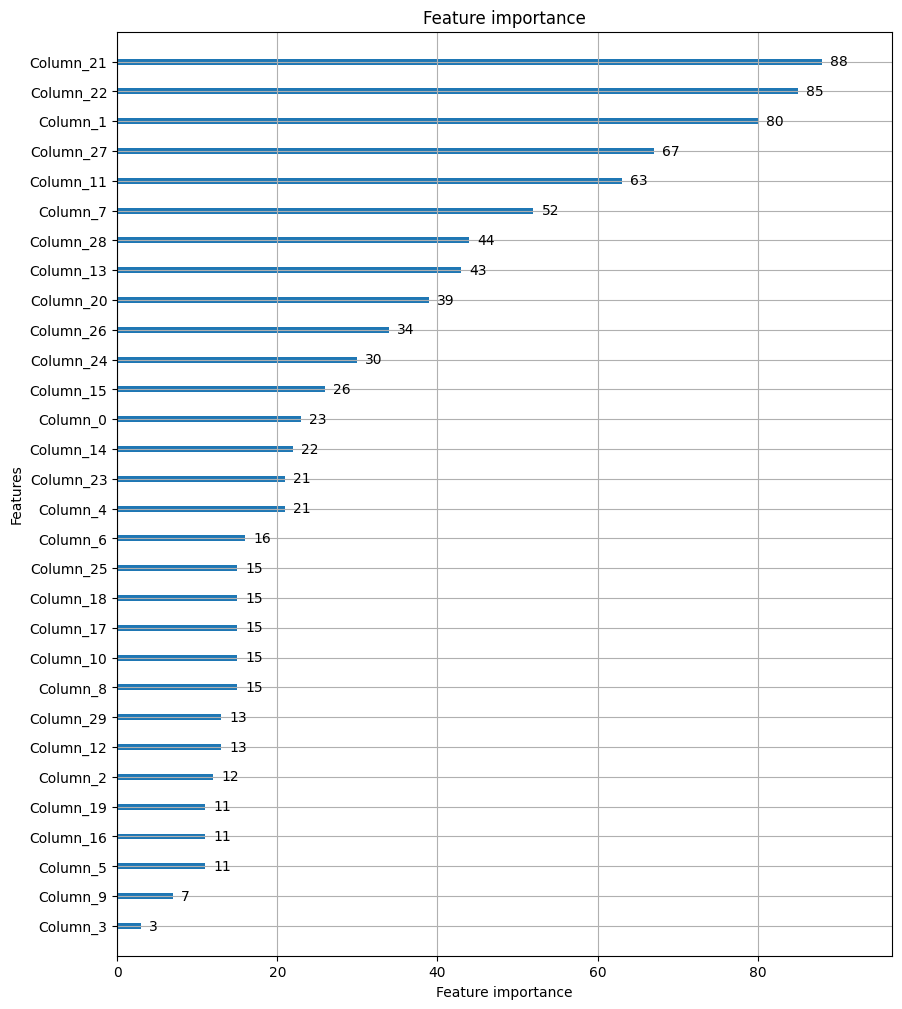

In [16]:
dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr, target,
                                                    test_size=0.2, random_state=156)
lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]

lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                 eval_metric='logloss', eval_set=evals, verbose=True)

pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)
plt.show()

In [17]:
# 평가지표 출력하는 함수 설정
def get_clf_eval(y_test, y_pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, pred_proba)

    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

get_clf_eval(y_test, pred, pred_proba)

오차행렬:
 [[33  4]
 [ 1 76]]

정확도: 0.9561
정밀도: 0.9500
재현율: 0.9870
F1: 0.9682
AUC: 0.9905
